# K-Nearest Neighbour

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Modules import Cleaner as cl
from Modules import DataSource

# SLOW
#dataset = DataSource.fetch('http://notebookserver:5000/api/cars/all','./data/bilhandel_clean.csv')
# FAST
dataset = cl.get_and_clean_df('./data/bilhandel_clean.csv')
display(dataset)

./data/bilhandel_clean.csv


,Brændstoftype,Gearkasse,Make,Model,Antal døre,Grøn Ejerafgift,Hestekræfter,Kilometer,Km/l,Antal gear,0 - 100 km/t,Nypris,Årgang,Tophastighed,Vægt,Pris
0,Diesel,Manuel,Peugeot,"407 1,6 HDi XR SW",5.0,6540.0,110.0,292000.0,17.9,6.0,13.7,307689.0,2005,189.0,1475.0,14700
2,Diesel,Automatisk,Skoda,"Superb 2,0 TDi 150 Ambition DSG",5.0,3880.0,150.0,243000.0,22.2,6.0,8.9,436000.0,2016,218.0,1400.0,169700
3,Benzin,Automatisk,VW,"Passat 1,4 GTE Variant DSG Van",5.0,660.0,218.0,75000.0,32.3,6.0,7.6,318324.0,2018,225.0,1635.0,2495
4,Benzin,Manuel,Kia,"Rio 1,2 CVVT Collect",5.0,660.0,86.0,107000.0,21.3,5.0,13.1,139998.0,2014,168.0,1158.0,69800
5,Diesel,Manuel,Peugeot,"407 1,6 HDi XR SW",5.0,6540.0,110.0,292000.0,17.9,6.0,13.7,307689.0,2005,189.0,1475.0,14700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,Benzin,Manuel,Seat,"Mii 1,0 60 Style eco",5.0,660.0,60.0,156000.0,24.4,5.0,14.4,102402.0,2014,161.0,940.0,49999
19995,Benzin,Automatisk,BMW,"530i 2,0 aut.",4.0,1780.0,252.0,57000.0,18.2,8.0,6.2,662193.0,2018,250.0,1515.0,459900
19996,Benzin,Automatisk,VW,"Polo 1,0 TSi 115 Highline DSG",5.0,1080.0,115.0,5000.0,22.9,7.0,9.5,216117.0,2020,200.0,1090.0,249500
19997,Benzin,Manuel,Skoda,"Octavia 1,2 TSi 105 Ambiente",5.0,1880.0,105.0,156000.0,17.5,6.0,10.8,224002.0,2011,192.0,1170.0,64900


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
#features
X = dataset.loc[:, ['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris']].values
#target
y = dataset.loc[:, ['Brændstoftype']].values

le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [32]:
# Scales features, as to not have a feature outweigh others, when it is not desired.
scaled_features = scaler.transform(X)
dataset_features = pd.DataFrame(scaled_features,columns=['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris'])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred = knn.predict(X_test)
display(pred)

from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

array(['Benzin', 'Diesel', 'Benzin', ..., 'Benzin', 'Diesel', 'Benzin'],
      dtype=object)

WITH K=1


[[1919   45    0]
 [  45 1510    0]
 [   1    0   83]]


              precision    recall  f1-score   support

      Benzin       0.98      0.98      0.98      1964
      Diesel       0.97      0.97      0.97      1555
          El       1.00      0.99      0.99        84

    accuracy                           0.97      3603
   macro avg       0.98      0.98      0.98      3603
weighted avg       0.97      0.97      0.97      3603



# Choosing a K Value

In [36]:
error_rate = []
# Might take some time
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Choose the amount of neighbors where the adjacent erorr rates are as close as possible

(0.5, 0.55)

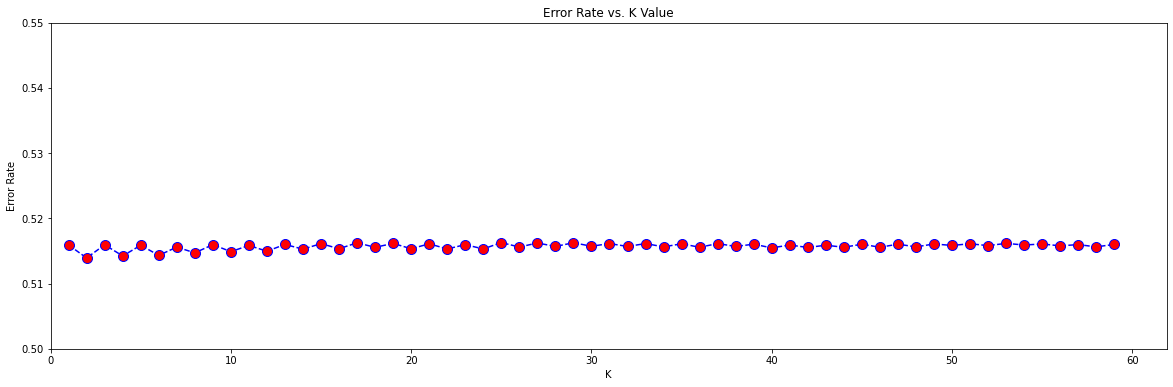

In [45]:
plt.figure(figsize=(20,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xlim(0)
plt.ylim(0.5, 0.55)

In [41]:
# NOW WITH K=60
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[1864  100    0]
 [ 106 1449    0]
 [   1    0   83]]


              precision    recall  f1-score   support

      Benzin       0.95      0.95      0.95      1964
      Diesel       0.94      0.93      0.93      1555
          El       1.00      0.99      0.99        84

    accuracy                           0.94      3603
   macro avg       0.96      0.96      0.96      3603
weighted avg       0.94      0.94      0.94      3603

